# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Data Visualization

In [37]:
import seaborn as sns
df.corr()

,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


<AxesSubplot:>

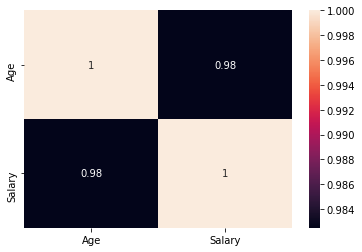

In [39]:
sns.heatmap(df.corr(), annot=True)

In [47]:
con = df.Country.value_counts().to_dict()
con

{'France': 4, 'Spain': 3, 'Germany': 3}

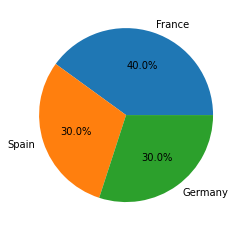

In [51]:
plt.pie(con.values(),labels=con, autopct='%1.1f%%')
plt.show()

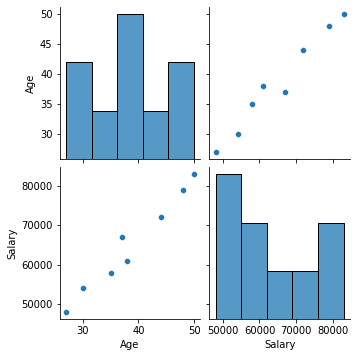

In [53]:
sns.pairplot(data=df)

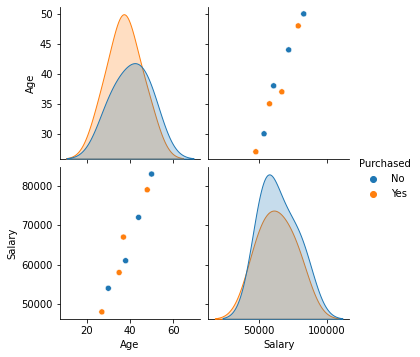

In [55]:
sns.pairplot(data=df,hue='Purchased')

<AxesSubplot:xlabel='Age', ylabel='Country'>

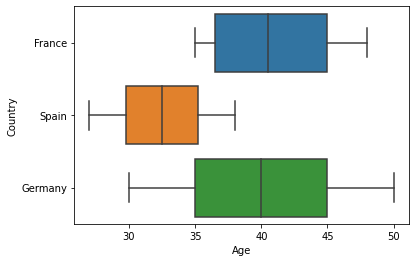

In [56]:
sns.boxplot(x=df['Age'],y=df['Country'])

<AxesSubplot:xlabel='Salary', ylabel='Country'>

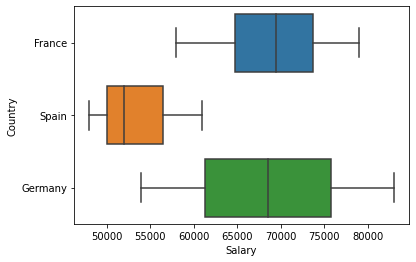

In [57]:
sns.boxplot(x=df['Salary'],y=df['Country'])

<AxesSubplot:xlabel='Salary', ylabel='Purchased'>

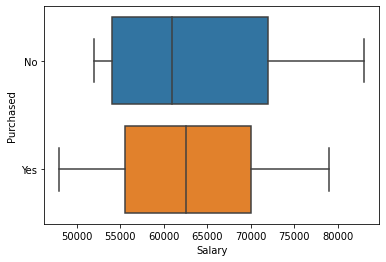

In [58]:
sns.boxplot(x=df['Salary'],y=df['Purchased'])

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

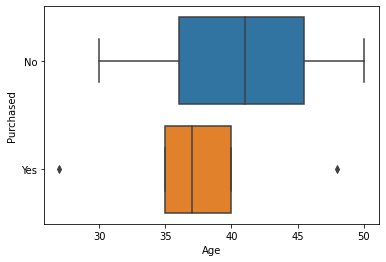

In [59]:
sns.boxplot(x=df['Age'],y=df['Purchased'])

# Handling Missing Data

In [8]:
# Replacing NAN values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:,1:3] = imputer.transform(X[:, 1:3])

In [10]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding Categorical Values

In [12]:
## One hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [24]:
ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0]) ], remainder='passthrough')
X = ct.fit_transform(X)

In [26]:
print(type(X))

<class 'numpy.ndarray'>


In [27]:
print(X)

[[1.0 0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 1.0 0.0 0.0 35.0 58000.0]
 [0.0 1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 0.0 37.0 67000.0]]


In [32]:
# Label Encoding Last Colums
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [33]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


# Splitting Dataset

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [63]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (8, 7)
Shape of X_test:  (2, 7)
Shape of y_train:  (8,)
Shape of y_test:  (2,)


In [65]:
print("X_train:\n",X_train)

X_train:
 [[0.0 1.0 0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 1.0 0.0 0.0 44.0 72000.0]
 [0.0 1.0 0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 1.0 0.0 0.0 35.0 58000.0]]


In [66]:
print("X_test:\n",X_test)

X_test:
 [[0.0 1.0 0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 1.0 0.0 0.0 37.0 67000.0]]


In [67]:
print("y_train:\n",y_train)

y_train:
 [0 1 0 0 1 1 0 1]


In [68]:
print("y_test:\n",y_test)

y_test:
 [0 1]


# Feature Scaling